In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
pd.Categorical(df.Geography)

[France, Spain, France, France, Spain, ..., France, France, France, Germany, France]
Length: 10000
Categories (3, object): [France, Germany, Spain]

In [7]:
df['cc']=pd.Categorical(df.Geography)

In [8]:
df['Geography_cc']=df['cc'].cat.codes

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,cc,Geography_cc
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,France,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Spain,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,France,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,France,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Spain,2


In [10]:
df.drop(['cc','Geography'],axis=1,inplace=True)

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_cc
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,2


In [12]:
pd.Categorical(df.Gender)

[Female, Female, Female, Female, Female, ..., Male, Male, Female, Male, Female]
Length: 10000
Categories (2, object): [Female, Male]

In [13]:
df['G_cc']=pd.Categorical(df.Gender)

In [14]:
df['Gender_cc']=df['G_cc'].cat.codes

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_cc,G_cc,Gender_cc
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,0,Female,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,2,Female,0
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,Female,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,0,Female,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,2,Female,0


In [16]:
df.drop(['G_cc','Gender'],axis=1,inplace=True)

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_cc,Gender_cc
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [18]:
df.drop(['RowNumber','Surname','CustomerId'],axis=1,inplace=True)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_cc,Gender_cc
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [20]:
df.isnull().sum().sum()

0

In [21]:
corrMatrix=df.corr()

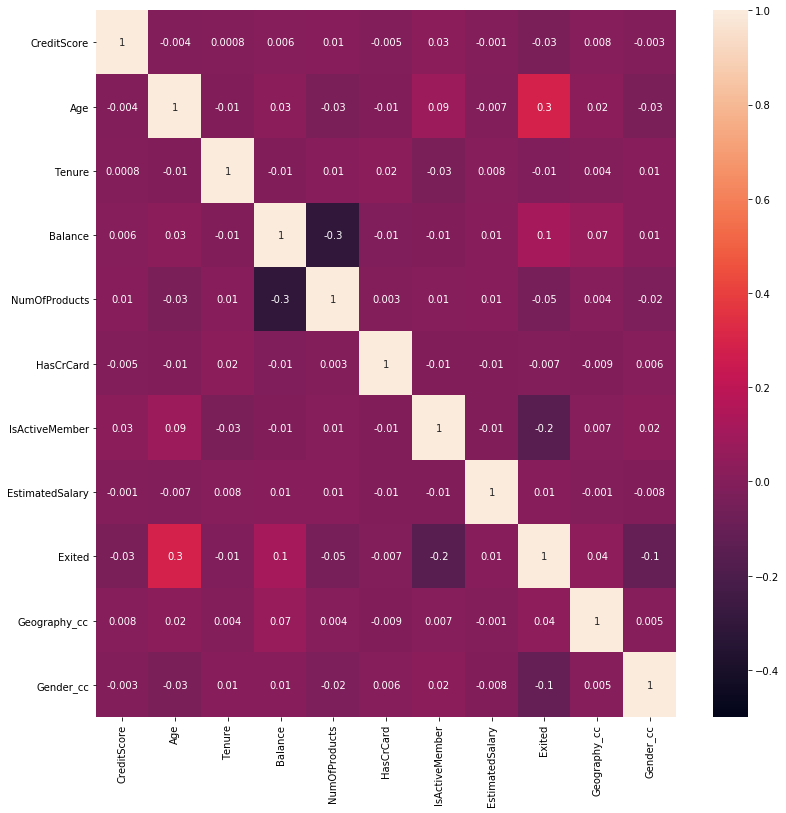

In [22]:
plt.figure(figsize=(13, 13))
ax=sns.heatmap(corrMatrix,vmin=-0.5, vmax=1,annot=True,fmt=".1g")

From the cross correlation heatmap only four variable is related with the Exited column
Thus

In [23]:
data=df[['Geography_cc','Age','Balance','EstimatedSalary','Exited']]

### Training , Validation and Testing

In [24]:
# taking 20% of data for testinga and validation
data_TstVal = data.sample(frac=0.20) 
print(data_TstVal.shape)
# Remove the test and validation data and create a trining set
data_train=data.drop(data_TstVal.index)
print(data_train.shape)
data_train.reset_index(drop=True)
print(data_train.shape)
data_train.head()

(2000, 5)
(8000, 5)
(8000, 5)


,Geography_cc,Age,Balance,EstimatedSalary,Exited
0,0,42,0.00,101348.88,1
1,2,41,83807.86,112542.58,0
2,0,42,159660.80,113931.57,1
3,0,39,0.00,93826.63,0
4,2,43,125510.82,79084.10,0


In [25]:
y=data_train['Exited'].to_numpy()
y.shape

(8000,)

### Data Normalization for the training data

In [26]:
df_min_max_scaled = data_train.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

In [27]:
df_min_max_scaled.head()

,Geography_cc,Age,Balance,EstimatedSalary,Exited
0,0.0,0.324324,0.000000,0.506541,1.0
1,1.0,0.310811,0.334031,0.562537,0.0
2,0.0,0.324324,0.636357,0.569485,1.0
3,0.0,0.283784,0.000000,0.468912,0.0
4,1.0,0.337838,0.500246,0.395163,0.0


In [28]:
X=df_min_max_scaled.drop('Exited',axis=1).to_numpy()
X

array([[0.        , 0.32432432, 0.        , 0.50654122],
       [1.        , 0.31081081, 0.33403148, 0.56253704],
       [0.        , 0.32432432, 0.63635718, 0.56948538],
       ...,
       [0.        , 0.22972973, 0.22865702, 0.50829652],
       [0.5       , 0.32432432, 0.29922631, 0.46421877],
       [0.        , 0.13513514, 0.51870777, 0.19059655]])

### Equations

$$ ReLU(x) = \left\{ \begin{array}{rcl} 0 & \mbox{for}& x<0  \\x & \mbox{for} & x>0 \end{array} \right. $$
$$ tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$
$$ softmax\space { \sigma (\overline {\textit z})_i= \frac{e^{\textit z_i}}{\sum^K_{j=1}{e^{\textit z_j}}}}  $$

In [29]:
def linear(H):
    return H
  
def ReLU(H):
    return H*(H>0)

def sigmoid(H):
    return 1/(1+ np.exp(-H))

def softmax(H):
    eH=np.exp(H)
    return eH/eH.sum(axis=1, keepdims =True)

def cross_entropy(Y,P_hat):
    return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y,Y_hat):
    return (1/(2*len(Y)))*np.sum((Y - Y_hat)**2)

def one_hot_encode(y):
    N=len(y)
    K = len(set(y))
    Y=np.zeros((N,K))

    for i in range(N):
        Y[i, y[i]]=1

    return Y

def accuracy(y, y_hat):
    return np.mean(y==y_hat)

def R2(y,y_hat):
    return 1- np.sum((y - y_hat)**2)/np.sum((y - y.mean())**2)

In [30]:
def derivative(Z,a):
    if a==linear:
        return 1
    elif a==sigmoid:
        return Z*(1-Z)
    elif a==np.tanh:
        return 1-Z*Z
    elif a==ReLU:
        return (Z>0).astype(int)
    else:
        ValueError("Unknown Activation Function")

In [31]:
class ANN():

    def __init__(self, architecture, activations = None, mode=0):
        self.mode=mode
        self.architecture = architecture
        self.activations = activations
        self.L  = len(architecture)+1

    def fit(self, X, y, eta=1e-3,epochs = 1e3, show_curve=False):
        epochs=int(epochs)
        if self.mode:
            Y=y
        else:
            Y = one_hot_encode(y)

        N, D =X.shape
        K=Y.shape[1]

        #Initialize Weights and Biases: Stochastic Initialization
        self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate
                  (zip(([D]+self.architecture),(self.architecture +[K])),1)}
        self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture +[K],1)}

        #Activation Function Loading
        if self.activations is None:
            self.a = {l: ReLU for l in range(1, self.L)}
        else:
            self.a = {l:act for l , act in enumerate(self.activations, 1)}

        #Mode Set
        if self.mode:
          self.a[self.L] = linear
        else:
          self.a[self.L] = softmax
        J = np.zeros(epochs)

        #Gradient Descent/ Back Propagation
        for epoch in range(epochs):
            self.forward(X)

            if self.mode:
                J[epoch] = OLS(Y, self.Z[self.L])

            else: 
                J[epoch] = cross_entropy(Y, self.Z[self.L])

            dH = (1/N)*(self.Z[self.L] -Y)

            for l in sorted(self.W.keys(), reverse =True):
                dW = self.Z[l-1].T@dH
                db = dH.sum(axis=0)

                self.W[l] -= eta*dW
                self.b[l] -= eta*db

                if l>1:
                    dZ = dH@self.W[l].T
                    dH = dZ*derivative(self.Z[l-1], self.a[l-1])

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.show()

    def forward(self, X):
        self.Z ={0:X}

        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.b[l])

    def predict(self, X):
        self.forward(X)

        if self.mode:
            return self.Z[self.L]
        else:
            return self.Z[self.L].argmax(axis=1)

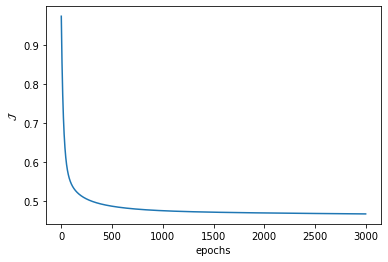

Training Accuracy: 0.7986


In [48]:
ann = ANN([20, 20, 20], [ReLU, np.tanh, sigmoid])
ann.fit(X, y, eta = 3e-3, epochs = 3e3, show_curve = True)
y_hat = ann.predict(X)
    
print(f"Training Accuracy: {accuracy(y, y_hat):0.4f}")

## Testing and Validation

In [49]:
#data_Tst=data_TstVal.sample(frac=0.50)
#print(data_Tst.shape)
data_Val=data_TstVal
print(data_Val.shape)

(2000, 5)


In [50]:
yV=data_Val['Exited'].to_numpy()
yV.shape

(2000,)

### Data Normalization for the validation data

In [51]:
dfV_min_max_scaled = data_Val.copy()
for column in dfV_min_max_scaled.columns:
    dfV_min_max_scaled[column] = (dfV_min_max_scaled[column] - dfV_min_max_scaled[column].min()) / (dfV_min_max_scaled[column].max() - dfV_min_max_scaled[column].min())

In [52]:
Xv=dfV_min_max_scaled.drop('Exited',axis=1).to_numpy()
Xv

array([[1.        , 0.22222222, 0.        , 0.20711507],
       [0.        , 0.31746032, 0.63470596, 0.26414477],
       [0.5       , 0.23809524, 0.4074381 , 0.21316201],
       ...,
       [0.        , 0.58730159, 0.        , 0.50795332],
       [1.        , 0.26984127, 0.53534525, 0.67820305],
       [0.        , 0.20634921, 0.        , 0.24404215]])

In [53]:
#ann = ANN([12, 12, 12,12], [ReLU, np.tanh, np.tanh, np.tanh])
#ann.fit(X, y, eta = 3e-3, epochs = 3e3, show_curve = True)
yv_hat = ann.predict(Xv)
print(f"Testing Accuracy: {accuracy(yV, yv_hat):0.4f}")

Testing Accuracy: 0.7835


In [54]:
def confusion_matrix(y, y_hat):
  plt.figure(figsize=(10,7))
  y_actu = pd.Series(y, name='Actual')
  y_pred = pd.Series(y_hat, name='Predicted')
  cm = pd.crosstab(y_actu, y_pred)
  ax = sns.heatmap(cm, annot=True, fmt="d")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

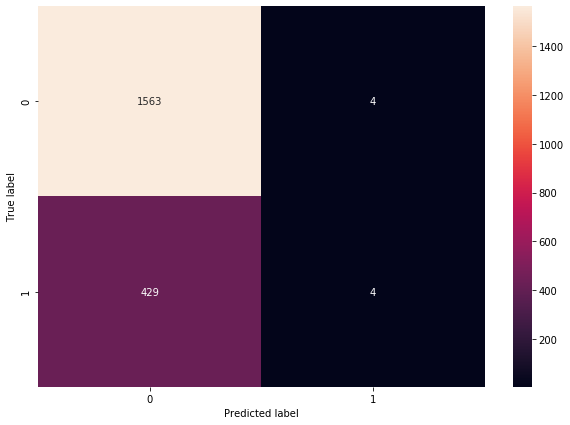

In [55]:
cm=confusion_matrix(yV,yv_hat)

In [56]:
yv_hat.sum()

8